In [1]:
import numpy as np

In [25]:
from sklearn.linear_model import Ridge
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
train_data = np.loadtxt("hw4_train.txt")
test_data = np.loadtxt("hw4_test.txt")

In [16]:
x_train, y_train = train_data[:,:2], train_data[:,2]
print(x_train.shape, y_train.shape)

x_test, y_test = test_data[:,:2], test_data[:,2]
print(x_test.shape, y_test.shape)

(200, 2) (200,)
(1000, 2) (1000,)


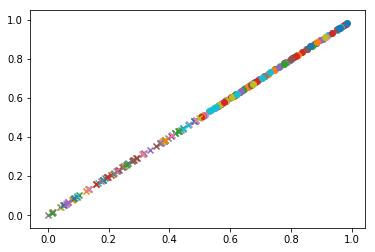

In [26]:
for i in range(x_train.shape[0]):
    if y_train[i] == 1 :
        plt.scatter(x_train[i,0], x_train[i,1], marker="o")
    else :
        plt.scatter(x_train[i,0], x_train[i,1], marker="x")

### 13

In [17]:
model = Ridge(alpha=10)

In [18]:
model.fit(x_train, y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [29]:
print(model.coef_, model.intercept_)

[ 1.16625186  1.1662378 ] -1.10053818223


In [36]:
y_train_preds = model.predict(x_train)
y_train_preds = [1 if i>=0 else -1 for i in y_train_preds]
print("Ein = ", 1 - sum(y_train_preds == y_train)/200)

Ein =  0.035


In [37]:
y_test_preds = model.predict(x_test)
y_test_preds = [1 if i>=0 else -1 for i in y_test_preds]
print("Eout = ", 1 - sum(y_test_preds == y_test)/1000)

Eout =  0.022


### 14

In [41]:
lambs = [-10, -8, -6, -4, -2]
Eins = []
Eouts = []

for lamb in lambs:
    model = Ridge(10**lamb)
    model.fit(x_train, y_train)
    
    y_train_preds = model.predict(x_train)
    y_train_preds = [1 if i>=0 else -1 for i in y_train_preds]
    Eins.append(1 - sum(y_train_preds == y_train)/200)
    
    y_test_preds = model.predict(x_test)
    y_test_preds = [1 if i>=0 else -1 for i in y_test_preds]
    Eouts.append(1 - sum(y_test_preds == y_test)/1000)


In [42]:
Eins

[0.015000000000000013,
 0.015000000000000013,
 0.035000000000000031,
 0.030000000000000027,
 0.030000000000000027]

In [43]:
Eouts

[0.020000000000000018,
 0.020000000000000018,
 0.016000000000000014,
 0.016000000000000014,
 0.016000000000000014]

### 15

In [47]:
lambs = range(-10,3)
Eins = []
Eouts = []

for lamb in lambs:
    model = Ridge(10**lamb)
    model.fit(x_train, y_train)
    
    y_train_preds = model.predict(x_train)
    y_train_preds = [1 if i>=0 else -1 for i in y_train_preds]
    Eins.append(1 - sum(y_train_preds == y_train)/200)
    
    y_test_preds = model.predict(x_test)
    y_test_preds = [1 if i>=0 else -1 for i in y_test_preds]
    Eouts.append(1 - sum(y_test_preds == y_test)/1000)

In [48]:
Eins

[0.015000000000000013,
 0.015000000000000013,
 0.015000000000000013,
 0.030000000000000027,
 0.035000000000000031,
 0.030000000000000027,
 0.030000000000000027,
 0.030000000000000027,
 0.030000000000000027,
 0.030000000000000027,
 0.035000000000000031,
 0.035000000000000031,
 0.099999999999999978]

In [49]:
Eouts

[0.020000000000000018,
 0.020000000000000018,
 0.020000000000000018,
 0.015000000000000013,
 0.016000000000000014,
 0.016000000000000014,
 0.016000000000000014,
 0.016000000000000014,
 0.016000000000000014,
 0.016000000000000014,
 0.017000000000000015,
 0.02200000000000002,
 0.09099999999999997]

### 16-17

In [51]:
x_train_, x_val_ = x_train[:120], x_train[120:]
y_train_, y_val_ = y_train[:120], y_train[120:]

In [56]:
lambs = range(-10,3)
Eins = []
Evals = []
Eouts = []

for lamb in lambs:
    model = Ridge(10**lamb)
    model.fit(x_train_, y_train_)
    
    y_train_preds = model.predict(x_train_)
    y_train_preds = [1 if i>=0 else -1 for i in y_train_preds]
    Eins.append(1 - sum(y_train_preds == y_train_)/120)
    
    y_val_preds = model.predict(x_val_)
    y_val_preds = [1 if i>=0 else -1 for i in y_val_preds]
    Evals.append(1 - sum(y_val_preds == y_val_)/80)
    
    y_test_preds = model.predict(x_test)
    y_test_preds = [1 if i>=0 else -1 for i in y_test_preds]
    Eouts.append(1 - sum(y_test_preds == y_test)/1000)

In [57]:
Eins

[0.0083333333333333037,
 0.0,
 0.0,
 0.033333333333333326,
 0.033333333333333326,
 0.033333333333333326,
 0.033333333333333326,
 0.033333333333333326,
 0.033333333333333326,
 0.033333333333333326,
 0.033333333333333326,
 0.033333333333333326,
 0.25]

In [58]:
Evals

[0.125,
 0.099999999999999978,
 0.050000000000000044,
 0.037499999999999978,
 0.037499999999999978,
 0.037499999999999978,
 0.037499999999999978,
 0.037499999999999978,
 0.037499999999999978,
 0.037499999999999978,
 0.037499999999999978,
 0.0625,
 0.32499999999999996]

In [59]:
Eouts

[0.040000000000000036,
 0.038000000000000034,
 0.025000000000000022,
 0.021000000000000019,
 0.021000000000000019,
 0.021000000000000019,
 0.021000000000000019,
 0.021000000000000019,
 0.021000000000000019,
 0.021000000000000019,
 0.02200000000000002,
 0.043000000000000038,
 0.30300000000000005]

### 18

In [61]:
lamb = 0

model = Ridge(10**lamb)
model.fit(x_train, y_train)

y_train_preds = model.predict(x_train)
y_train_preds = [1 if i>=0 else -1 for i in y_train_preds]
Ein = 1 - sum(y_train_preds == y_train)/200

y_test_preds = model.predict(x_test)
y_test_preds = [1 if i>=0 else -1 for i in y_test_preds]
Eout = 1 - sum(y_test_preds == y_test)/1000

print("Ein and Eout are : ", Ein, Eout)

Ein and Eout are :  0.035 0.017


### 19

In [97]:
from collections import defaultdict

In [89]:
y_train = y_train.reshape(200,1)

In [91]:
x_trains = []
y_trains = []
x_vals = []
y_vals = []


for i in range(0,200,40):
    splits_x = np.vsplit(x_train,[i,i+40])
    splits_y = np.vsplit(y_train,[i,i+40])
    
    x_train_part = np.concatenate([splits_x[0], splits_x[2]], axis=0)
    x_val_part = splits_x[1]
    
    y_train_part = np.concatenate([splits_y[0], splits_y[2]], axis=0)
    y_val_part = splits_y[1]    
    
    x_trains.append(x_train_part)
    x_vals.append(x_val_part)
    y_trains.append(np.squeeze(y_train_part))
    y_vals.append(np.squeeze(y_val_part))

In [111]:
lambs = range(-10,3)
Evals = {lamb:0 for lamb in lambs}

for lamb in lambs:
    model = Ridge(10**lamb)
    
    for x_train_part, y_train_part, x_val_part, y_val_part in zip(x_trains, y_trains, x_vals, y_vals):
        
        model.fit(x_train_part, y_train_part)

        y_val_preds = model.predict(x_val_part)
        y_val_preds = [1 if i>=0 else -1 for i in y_val_preds]
        Evals[lamb] += 1 - sum(y_val_preds == y_val_part)/40
        
        
Evals = {key:v/5 for key,v in Evals.items()}

In [112]:
Evals

{-10: 0.049999999999999975,
 -9: 0.049999999999999975,
 -8: 0.029999999999999982,
 -7: 0.034999999999999989,
 -6: 0.034999999999999989,
 -5: 0.034999999999999989,
 -4: 0.034999999999999989,
 -3: 0.034999999999999989,
 -2: 0.034999999999999989,
 -1: 0.034999999999999989,
 0: 0.034999999999999989,
 1: 0.039999999999999994,
 2: 0.13999999999999999}

### 20

In [118]:
print(x_train.shape, y_train.shape)

(200, 2) (200, 1)


In [124]:
lamb = -8

model = Ridge(10**lamb)
model.fit(x_train, y_train)

y_train_preds = model.predict(x_train)
y_train_preds = [1 if i>=0 else -1 for i in y_train_preds]
Ein = 1 - sum(y_train_preds == np.squeeze(y_train))/200

y_test_preds = model.predict(x_test)
y_test_preds = [1 if i>=0 else -1 for i in y_test_preds]
Eout = 1 - sum(y_test_preds == y_test)/1000

print("Ein and Eout are : ", Ein, Eout)

Ein and Eout are :  0.015 0.02
